# Project: 'ml_Titanic'
* Purpose: (Kaggle)鐵達尼生存預測
* Model: Trial

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np
import copy

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
# Load data
data_path = './data/'
df_train = pd.read_csv(data_path + 'train.csv')
df_test = pd.read_csv(data_path + 'test.csv')

df_train.shape

(891, 12)

In [3]:
# Arrange data
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#取 int64, float64 兩種數值型欄位, 存於 num_features 中
#取類別值 (object) 型欄位, 存於 object_features 中
num_features = []
object_features = []

for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
    elif dtype == 'object':
        object_features.append(feature)
        
print(f'{len(num_features)} Numeric Features : {num_features}\n')
print(f'{len(object_features)} Object Features : {object_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

5 Object Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



In [5]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


### Feature Engineering (特徵工程)

In [6]:
# 填補缺值: 空值補平均值
df = df.fillna(df.mean())

In [7]:
# Baseline score
df_mm = MinMaxScaler().fit_transform(df)
train_X = df_mm[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6993501991462476

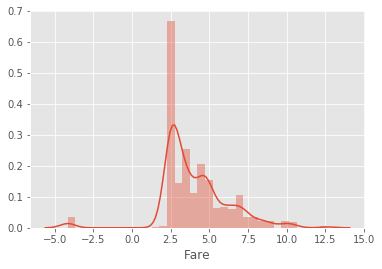

In [8]:
df_fixed = copy.deepcopy(df)

# Reduce skewness
df_fixed['Fare'] += 0.0001   # shift a little bit to ensure all data > 0, because original data >= 0      
df_fixed['Fare'] = stats.boxcox(df_fixed['Fare'])[0]

sns.distplot(df_fixed['Fare'][:train_num])
plt.show()

### Model Training

In [9]:
# Nomalization: MIn-Max
df_mm = MinMaxScaler().fit_transform(df_fixed)

In [10]:
# Training models by different training 
train_X = df_mm[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7049872206659582